# Document Clustering and Topic Modeling 

*In* this project, we use unsupervised learning models to cluster unlabeled documents into different groups, visualize the results and identify their latent topics/structures.

## Contents

* [Part 1: Load Data](#Part-1:-Load-Data)
* [Part 2: Tokenizing and Stemming](#Part-2:-Tokenizing-and-Stemming)
* [Part 3: TF-IDF](#Part-3:-TF-IDF)
* [Part 4: K-means clustering](#Part-4:-K-means-clustering)
* [Part 5: Topic Modeling - Latent Dirichlet Allocation](#Part-5:-Topic-Modeling---Latent-Dirichlet-Allocation)


# Part 1: Load Data

In [1]:
pip install wordcloud

     |████████████████████████████████| 158 kB 2.1 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [1]:
import numpy as np
import pandas as pd
import nltk
# import gensim

from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt

nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /Users/minxuanhu/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/minxuanhu/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [2]:
# Load data into dataframe
df = pd.read_csv('Amazon_Unlocked_Mobile.csv', error_bad_lines=False)

/var/folders/zs/7br09mqx1ys0tq0ms1qk75xm0000gn/T/ipykernel_2784/148489267.py:2: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv('Amazon_Unlocked_Mobile.csv', error_bad_lines=False)


In [3]:
df.head()

,Product Name,Brand Name,Price,Rating,Reviews,Review Votes
0,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,I feel so LUCKY to have found this used (phone...,1.0
1,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,"nice phone, nice up grade from my pantach revu...",0.0
2,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,Very pleased,0.0
3,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,It works good but it goes slow sometimes but i...,0.0
4,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,Great phone to replace my lost phone. The only...,0.0


In [4]:
# Remove missing value
df.dropna(subset=['Reviews'],inplace=True)

In [5]:
df.reset_index(inplace=True, drop=True)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 413778 entries, 0 to 413777
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Product Name  413778 non-null  object 
 1   Brand Name    348623 non-null  object 
 2   Price         407848 non-null  float64
 3   Rating        413778 non-null  int64  
 4   Reviews       413778 non-null  object 
 5   Review Votes  401482 non-null  float64
dtypes: float64(2), int64(1), object(3)
memory usage: 18.9+ MB


In [7]:
# select our training data
data = df['Reviews'].tolist()

In [8]:
data

["I feel so LUCKY to have found this used (phone to us & not used hard at all), phone on line from someone who upgraded and sold this one. My Son liked his old one that finally fell apart after 2.5+ years and didn't want an upgrade!! Thank you Seller, we really appreciate it & your honesty re: said used phone.I recommend this seller very highly & would but from them again!!",
 'nice phone, nice up grade from my pantach revue. Very clean set up and easy set up. never had an android phone but they are fantastic to say the least. perfect size for surfing and social media. great phone samsung',
 'Very pleased',
 'It works good but it goes slow sometimes but its a very good phone I love it',
 'Great phone to replace my lost phone. The only thing is the volume up button does not work, but I can still go into settings to adjust. Other than that, it does the job until I am eligible to upgrade my phone again.Thaanks!',
 'I already had a phone with problems... I know it stated it was used, but d

# Part 2: Tokenizing and Stemming

Load stopwords and stemmer function from NLTK library.
Stop words are words like "a", "the", or "in" which don't convey significant meaning.
Stemming is the process of breaking a word down into its root.

In [8]:
# Use nltk's English stopwords.
stopwords = nltk.corpus.stopwords.words('english') #stopwords.append("n't")
stopwords.append("'s")
stopwords.append("'m")
stopwords.append("br") #html <br>
stopwords.append("phone")

print ("We use " + str(len(stopwords)) + " stop-words from nltk library.")
print (stopwords[:10])

We use 183 stop-words from nltk library.
['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]


Use our defined functions to analyze (i.e. tokenize, stem) our reviews.

In [9]:
from nltk.stem.snowball import SnowballStemmer
# from nltk.stem import WordNetLemmatizer 

stemmer = SnowballStemmer("english")

# tokenization and stemming
def tokenization_and_stemming(text):
    tokens = []
    # exclude stop words and tokenize the document, generate a list of string 
    for word in nltk.word_tokenize(text):
        if word.lower() not in stopwords:
            tokens.append(word.lower())

    filtered_tokens = []
    
    # filter out any tokens not containing letters (e.g., numeric tokens, raw punctuation)
    for token in tokens:
        if token.isalpha():
            filtered_tokens.append(token)
            
    # stemming
    stems = [stemmer.stem(t) for t in filtered_tokens]
    return stems

In [10]:
tokenization_and_stemming(data[0])

['feel',
 'lucki',
 'found',
 'use',
 'us',
 'use',
 'hard',
 'line',
 'someon',
 'upgrad',
 'sold',
 'one',
 'son',
 'like',
 'old',
 'one',
 'final',
 'fell',
 'apart',
 'year',
 'want',
 'upgrad',
 'thank',
 'seller',
 'realli',
 'appreci',
 'honesti',
 'said',
 'use',
 'recommend',
 'seller',
 'high',
 'would']

In [11]:
data[0]

"I feel so LUCKY to have found this used (phone to us & not used hard at all), phone on line from someone who upgraded and sold this one. My Son liked his old one that finally fell apart after 2.5+ years and didn't want an upgrade!! Thank you Seller, we really appreciate it & your honesty re: said used phone.I recommend this seller very highly & would but from them again!!"

# Part 3: TF-IDF

TF: Term Frequency

IDF: Inverse Document Frequency

In [12]:
from sklearn.feature_extraction.text import TfidfVectorizer
# define vectorizer parameters
# TfidfVectorizer will help us to create tf-idf matrix
# max_df : maximum document frequency for the given word
# min_df : minimum document frequency for the given word
# max_features: maximum number of words
# use_idf: if not true, we only calculate tf
# stop_words : built-in stop words
# tokenizer: how to tokenize the document
# ngram_range: (min_value, max_value), eg. (1, 3) means the result will include 1-gram, 2-gram, 3-gram
tfidf_model = TfidfVectorizer(max_df=0.99, max_features=1000,
                                 min_df=0.01, stop_words=stopwords,
                                 use_idf=True, tokenizer=tokenization_and_stemming, ngram_range=(1,2))

tfidf_matrix = tfidf_model.fit_transform(data) #fit the vectorizer to synopses

print ("In total, there are " + str(tfidf_matrix.shape[0]) + \
      " reviews and " + str(tfidf_matrix.shape[1]) + " terms.")

/opt/anaconda3/lib/python3.8/site-packages/sklearn/feature_extraction/text.py:404: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['could', 'might', 'must', 'need', 'sha', 'wo', 'would'] not in stop_words.
  warnings.warn(


In total, there are 413778 reviews and 366 terms.


In [14]:
tfidf_matrix

<413778x366 sparse matrix of type '<class 'numpy.float64'>'
	with 4203123 stored elements in Compressed Sparse Row format>

In [13]:
tfidf_matrix.toarray() #todense()

array([[0.        , 0.        , 0.        , ..., 0.        , 0.18118964,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [14]:
tfidf_matrix.todense()

matrix([[0.        , 0.        , 0.        , ..., 0.        , 0.18118964,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        ...,
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ]])

In [17]:
print(type(tfidf_matrix.toarray()))

<class 'numpy.ndarray'>


In [18]:
print(type(tfidf_matrix.todense()))

<class 'numpy.matrix'>


Save the terms identified by TF-IDF.

In [15]:
# words
tf_selected_words = tfidf_model.get_feature_names_out()

In [16]:
# print out words
tf_selected_words

array(['abl', 'absolut', 'activ', 'actual', 'advertis', 'ago', 'almost',
       'alreadi', 'also', 'although', 'alway', 'amaz', 'amazon',
       'android', 'anoth', 'anyon', 'anyth', 'app', 'appl', 'around',
       'arriv', 'ask', 'avail', 'away', 'awesom', 'back', 'bad', 'basic',
       'batteri', 'batteri life', 'beauti', 'best', 'better', 'big',
       'bit', 'black', 'blackberri', 'blu', 'bluetooth', 'bought', 'box',
       'brand', 'brand new', 'button', 'buy', 'ca', 'call', 'came',
       'camera', 'card', 'care', 'carrier', 'case', 'cell', 'cellphon',
       'chang', 'charg', 'charger', 'cheap', 'check', 'clear', 'color',
       'come', 'compani', 'compar', 'complaint', 'complet', 'condit',
       'connect', 'contact', 'cost', 'could', 'coupl', 'cover', 'custom',
       'damag', 'data', 'daughter', 'day', 'deal', 'decent', 'decid',
       'defect', 'definit', 'deliveri', 'describ', 'design', 'devic',
       'die', 'differ', 'disappoint', 'display', 'download', 'drop',
       'ea

# Part 4: K-means clustering

In [17]:
# k-means clustering
from sklearn.cluster import KMeans

num_clusters = 5

# number of clusters
km = KMeans(n_clusters=num_clusters)
km.fit(tfidf_matrix)

clusters = km.labels_.tolist()

## 4.1. Analyze K-means Result

In [18]:
# create DataFrame films from all of the input files.
product = {'review': df.Reviews, 'cluster': clusters}
frame = pd.DataFrame(product)

In [19]:
frame.head(10)

,review,cluster
0,I feel so LUCKY to have found this used (phone...,3
1,"nice phone, nice up grade from my pantach revu...",3
2,Very pleased,3
3,It works good but it goes slow sometimes but i...,0
4,Great phone to replace my lost phone. The only...,3
5,I already had a phone with problems... I know ...,3
6,The charging port was loose. I got that solder...,3
7,"Phone looks good but wouldn't stay charged, ha...",3
8,I originally was using the Samsung S2 Galaxy f...,3
9,It's battery life is great. It's very responsi...,3


In [20]:
print ("Number of reviews included in each cluster:")
frame['cluster'].value_counts().to_frame()
# Convert Series to DataFrame

Number of reviews included in each cluster:


,cluster
3,318695
1,33587
0,23501
2,19849
4,18146


In [25]:
km.cluster_centers_

array([[3.26545924e-04, 6.16005962e-03, 7.41208894e-04, ...,
        2.95927216e-04, 1.10677720e-03, 7.05325945e-04],
       [6.40323012e-03, 4.15909363e-03, 6.82396938e-03, ...,
        3.86387293e-03, 8.15910435e-03, 4.50297808e-03],
       [2.87032091e-04, 5.23282769e-05, 7.34428005e-04, ...,
        0.00000000e+00, 1.17050356e-04, 1.10082529e-04],
       [5.21867318e-05, 4.08471114e-04, 3.66636202e-05, ...,
        9.82477210e-05, 3.08919634e-04, 3.60512411e-04],
       [1.26256170e-03, 2.36988453e-03, 2.44946199e-03, ...,
        9.15962384e-04, 3.37849725e-03, 1.31303961e-03]])

In [21]:
km.cluster_centers_.shape

(5, 366)

In [22]:
print ("<Document clustering result by K-means>")

#km.cluster_centers_ denotes the importances of each items in centroid.
#We need to sort it in decreasing-order and get the top k items.
order_centroids = km.cluster_centers_.argsort()[:, ::-1] 

Cluster_keywords_summary = {}
for i in range(num_clusters):
    print ("Cluster " + str(i) + " words:", end='')
    Cluster_keywords_summary[i] = []
    for ind in order_centroids[i, :10]: 
        Cluster_keywords_summary[i].append(tf_selected_words[ind])
        print (tf_selected_words[ind] + ",", end='')
    print ()
    
    cluster_reviews = frame[frame.cluster==i].review.tolist()
    print ("Cluster " + str(i) + " reviews (" + str(len(cluster_reviews)) + " reviews): ")
    # print (", ".join(cluster_reviews))
    print ()

<Document clustering result by K-means>
Cluster 0 words:good,product,price,work,thank,far,realli,qualiti,like,recommend,
Cluster 0 reviews (23501 reviews): 

Cluster 1 words:great,work great,work,product,price,great price,condit,fast,love,thank,
Cluster 1 reviews (33587 reviews): 

Cluster 2 words:love,great,bought,daughter,new,thank,good,wife,gift,perfect,
Cluster 2 reviews (19849 reviews): 

Cluster 3 words:work,use,like,good,one,perfect,nice,get,excelent,batteri,
Cluster 3 reviews (318695 reviews): 

Cluster 4 words:excel,product,recommend,good,thank,seller,condit,price,love,fast,
Cluster 4 reviews (18146 reviews): 



# Part 5: Topic Modeling - Latent Dirichlet Allocation

In [23]:
# Use LDA for clustering
from sklearn.decomposition import LatentDirichletAllocation
lda = LatentDirichletAllocation(n_components=5)

In [24]:
# document topic matrix for tfidf_matrix_lda
lda_output = lda.fit_transform(tfidf_matrix)
print(lda_output.shape)
print(lda_output)

(413778, 5)
[[0.05460782 0.82645341 0.03924332 0.04005222 0.03964323]
 [0.05202423 0.05178605 0.73958341 0.05295695 0.10364936]
 [0.59741109 0.10176433 0.10047535 0.1003492  0.10000003]
 ...
 [0.08284276 0.08388492 0.08384987 0.66657603 0.08284642]
 [0.06770673 0.59798744 0.07059964 0.06905009 0.1946561 ]
 [0.067859   0.07178183 0.72316135 0.06932634 0.06787148]]


In [25]:
# topics and words matrix
topic_word = lda.components_
print(topic_word.shape)
print(topic_word)

(5, 366)
[[2.01249380e-01 2.75505750e+01 4.31091906e+00 ... 2.00780317e-01
  2.04871622e-01 2.01420189e-01]
 [9.60289820e+02 3.22341414e+02 1.87170862e+03 ... 1.03774263e+03
  1.02204228e+03 5.48992543e+02]
 [1.00971094e+03 1.54403657e+02 3.81455806e+02 ... 1.42519844e+02
  2.89655033e+02 4.27956801e+02]
 [1.00356101e+02 5.52304688e+02 4.71684079e+00 ... 7.53741674e+01
  1.40600184e+03 5.10308571e+02]
 [2.00751725e-01 4.80966356e+02 2.00950386e-01 ... 2.00724348e-01
  2.02595396e-01 7.02781170e-01]]


In [26]:
# column names
topic_names = ["Topic" + str(i) for i in range(lda.n_components)]

# index names
doc_names = ["Doc" + str(i) for i in range(len(data))]

df_document_topic = pd.DataFrame(np.round(lda_output, 2), columns=topic_names, index=doc_names)

# get dominant topic for each document
topic = np.argmax(df_document_topic.values, axis=1)
df_document_topic['topic'] = topic

df_document_topic.head(10)

,Topic0,Topic1,Topic2,Topic3,Topic4,topic
Doc0,0.05,0.83,0.04,0.04,0.04,1
Doc1,0.05,0.05,0.74,0.05,0.10,2
Doc2,0.60,0.10,0.10,0.10,0.10,0
Doc3,0.06,0.06,0.06,0.42,0.38,3
Doc4,0.05,0.05,0.05,0.80,0.05,3
Doc5,0.04,0.84,0.04,0.04,0.04,1
Doc6,0.05,0.79,0.05,0.05,0.05,1
Doc7,0.05,0.78,0.05,0.05,0.07,1
Doc8,0.03,0.03,0.89,0.03,0.03,2
Doc9,0.04,0.04,0.04,0.83,0.04,3


In [27]:
df_document_topic['topic'].value_counts().to_frame()

,topic
1,116213
3,85666
2,84374
0,79249
4,48276


In [28]:
# topic word matrix
print(lda.components_)
# topic-word matrix
df_topic_words = pd.DataFrame(lda.components_)

# column and index
df_topic_words.columns = tfidf_model.get_feature_names_out()
df_topic_words.index = topic_names

df_topic_words.head()

[[2.01249380e-01 2.75505750e+01 4.31091906e+00 ... 2.00780317e-01
  2.04871622e-01 2.01420189e-01]
 [9.60289820e+02 3.22341414e+02 1.87170862e+03 ... 1.03774263e+03
  1.02204228e+03 5.48992543e+02]
 [1.00971094e+03 1.54403657e+02 3.81455806e+02 ... 1.42519844e+02
  2.89655033e+02 4.27956801e+02]
 [1.00356101e+02 5.52304688e+02 4.71684079e+00 ... 7.53741674e+01
  1.40600184e+03 5.10308571e+02]
 [2.00751725e-01 4.80966356e+02 2.00950386e-01 ... 2.00724348e-01
  2.02595396e-01 7.02781170e-01]]


,abl,absolut,activ,actual,advertis,ago,almost,alreadi,also,although,...,work fine,work great,work perfect,work well,worth,would,would recommend,wrong,year,yet
Topic0,0.201249,27.550575,4.310919,1.751740,776.890635,0.200600,0.213635,0.201581,74.607006,0.242553,...,0.200734,4910.358022,0.201087,0.201982,0.201822,398.747720,280.406143,0.200780,0.204872,0.201420
Topic1,960.289820,322.341414,1871.708623,773.589278,1001.681599,711.122059,561.386515,1030.065892,1386.911579,336.992234,...,392.840372,74.537320,3.733910,143.677022,318.668204,3954.762009,274.059380,1037.742632,1022.042278,548.992543
Topic2,1009.710936,154.403657,381.455806,434.599851,214.866337,73.541718,397.314810,237.750776,1433.990464,401.359422,...,437.873597,379.165438,0.756411,3167.817674,200.482008,2084.606724,557.540000,142.519844,289.655033,427.956801
Topic3,100.356101,552.304688,4.716841,295.409266,0.201807,342.619950,430.851854,247.175367,893.142732,224.220006,...,0.201402,6.967150,0.201260,2.093102,1566.710522,1257.925233,309.854794,75.374167,1406.001840,510.308571
Topic4,0.200752,480.966356,0.200950,0.201827,394.965381,0.201074,72.675665,0.201170,3.991293,0.201334,...,1293.011761,0.200958,3015.732897,0.201234,0.200825,0.378673,0.201168,0.200724,0.202595,0.702781


In [40]:
# print top n keywords for each topic
def print_topic_words(tfidf_model, lda_model, n_words):
    words = np.array(tfidf_model.get_feature_names_out())
    topic_words = []
    # for each topic, we have words weight
    for topic_words_weights in lda_model.components_:
        top_words = topic_words_weights.argsort()[::-1][:n_words]
        topic_words.append(words.take(top_words))
    return topic_words

topic_keywords = print_topic_words(tfidf_model=tfidf_model, lda_model=lda, n_words=15)        

df_topic_words = pd.DataFrame(topic_keywords)
df_topic_words.columns = ['Word '+str(i) for i in range(df_topic_words.shape[1])]
df_topic_words.index = ['Topic '+str(i) for i in range(df_topic_words.shape[0])]
df_topic_words

,Word 0,Word 1,Word 2,Word 3,Word 4,Word 5,Word 6,Word 7,Word 8,Word 9,Word 10,Word 11,Word 12,Word 13,Word 14
Topic 0,great,excel,product,thank,expect,work great,work,describ,fast,price,recommend,condit,ship,arriv,great price
Topic 1,new,work,like,one,use,unlock,get,would,return,charg,buy,charger,came,problem,got
Topic 2,nice,work,sim,card,ok,use,well,sim card,app,batteri,work well,get,call,need,like
Topic 3,excelent,use,awesom,screen,camera,great,love,case,like,amaz,easi,one,price,batteri,realli
Topic 4,good,love,perfect,work,work perfect,best,fine,far,product,price,gift,cellphon,happi,ever,son


# Part 6: Wordcloud

In [46]:
from wordcloud import WordCloud

In [47]:
text = ' '.join([' '.join(Cluster_keywords_summary[i]) for i in range(5)])
text

'good product price work thank far realli qualiti like recommend great work great work product price great price condit fast love thank love great bought daughter new thank good wife gift perfect work use like good one perfect nice get excelent batteri excel product recommend good thank seller condit price love fast'

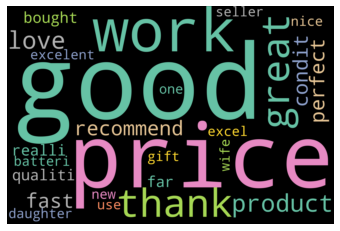

In [48]:
# Generate a word cloud image
wordcloud = WordCloud(width = 3000, height = 2000, random_state=1, background_color='black', colormap='Set2', collocations=False).generate(text)
# Display the generated image
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()